In [9]:
# 39개 마커
MARKERS = ['LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7', 'LSHO', 'RSHO', 'CLAV', 'RBAK',
           'LUPA', 'RUPA', 'STRN', 'T10', 'LELB', 'RELB', 'LFRM', 'RFRM',
           'LWRA', 'RWRA', 'LWRB', 'RWRB', 'LFIN', 'RFIN', 'LASI', 'RASI',
           'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB',
           'LANK', 'RANK', 'LTOE', 'RTOE', 'LHEE', 'RHEE']
len(MARKERS)

39

In [10]:
import os
import glob

import pandas as pd
import numpy as np
from scipy.linalg import dft

import matplotlib.pyplot as plt

In [11]:
DATAPATH = "/Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD"
CONTROL = os.path.join(DATAPATH, "Controls")
PD = os.path.join(DATAPATH, "PD")

# df_patients = pd.read_csv(os.path.join(DATAPATH, "patients.csv"))
# df_null_info = pd.read_csv(os.path.join(DATAPATH, "NULL_info.csv"))
# df_csvinfo = pd.read_csv(os.path.join(DATAPATH, "csvinfo.csv"))

In [12]:
SAVEPATH = "/Users/sujinlee/Desktop/nims/pd/experiment3_dft"
SAVEFOLDER = os.path.join(SAVEPATH, "results_std")

if os.path.exists(SAVEPATH) == False: os.makdir(SAVEPATH)
if os.path.exists(SAVEFOLDER) == False: os.mkdir(SAVEFOLDER)

In [13]:
def dft_left_right(TARGET_CATE, TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE):
    results = []
    inner_product = []

    for csv_file in glob.glob(os.path.join(TARGET_CATE, f"*{TARGET_MOTION}*.csv")):

        df = pd.read_csv(os.path.join(TARGET_CATE, csv_file))
        df = df.dropna()

        if len(df) < WINDOW_SIZE: continue 

        df_sub = df[:WINDOW_SIZE]
    #     print(csv_file, '|', len(df_sub))

        m_left = dft(len(df_sub[f"L{TARGET_MARKER}_Z"].values))
        x_left = df_sub[f"L{TARGET_MARKER}_Z"].values

        X_left = m_left @ x_left

        m_right = dft(len(df_sub[f"R{TARGET_MARKER}_Z"].values))
        x_right = df_sub[f"R{TARGET_MARKER}_Z"].values

        X_right = m_right @ x_right

        info = {"filename": csv_file,
                "length": len(df_sub),
                "X_left": X_left,
                "X_right": X_right,
                "inner product": abs(X_left) @ abs(X_right)
               }
    #     print(info)
        if info["inner product"] != None:
            inner_product.append(info["inner product"])

        results.append(info)

    print("Category:", TARGET_CATE)
    print("Motion:", TARGET_MOTION)
    print("Marker:", TARGET_MARKER)
    print("Window:", WINDOW_SIZE)
    print("Count:", len(results))
    print("Mean: ", np.mean(np.array(inner_product)))
    print("Std: ", np.std(np.array(inner_product)))

    plt.scatter(range(0, len(inner_product)), inner_product)
    plt.xlabel("Files")
    plt.ylabel("Inner product")
    plt.title("left & right inner product")
    plt.show()

    plt.hist(inner_product)
    plt.xlabel("Inner product")
    plt.ylabel("Count")
    plt.title("left & right inner product histogram")
    plt.show()
    
    return results, inner_product

In [17]:
os.path.join(PD, os.listdir(PD)[0])

'/Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD/LHEE_JYA_FW2.csv'

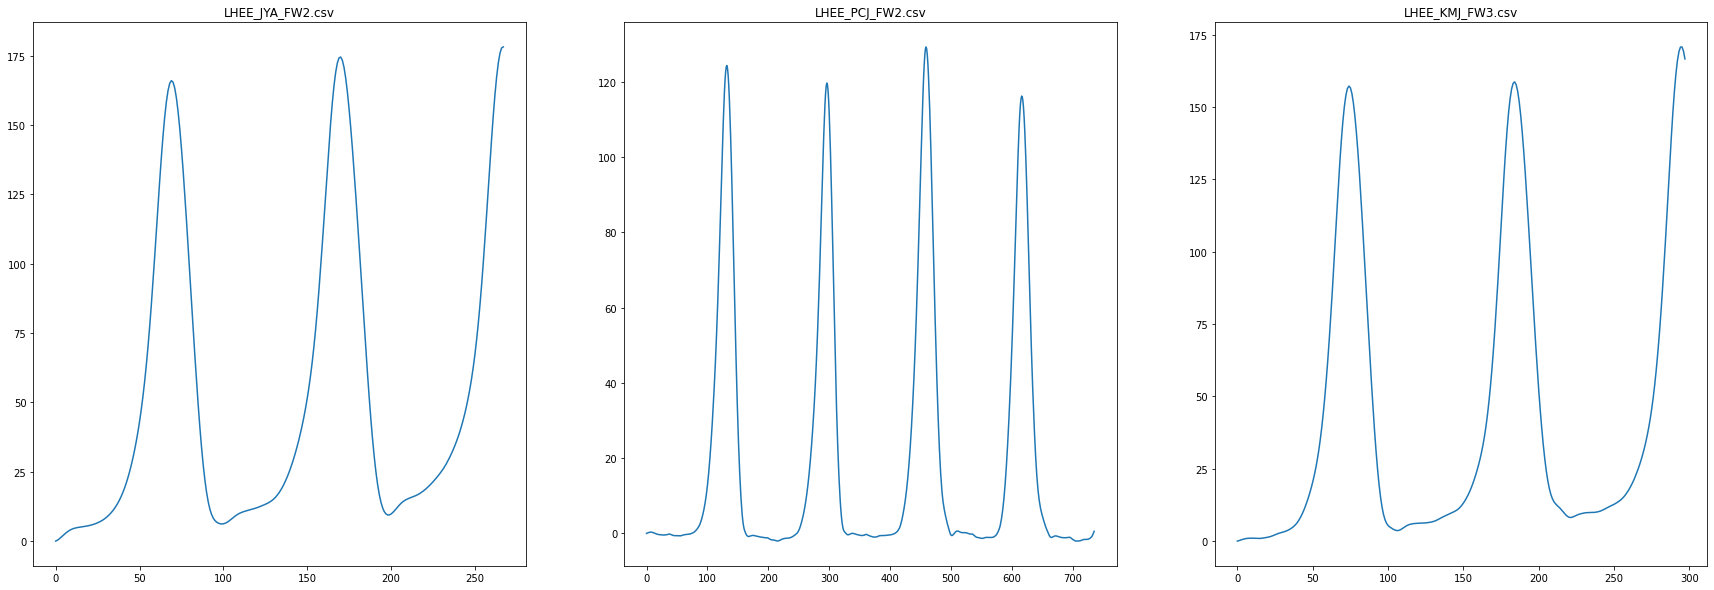

In [42]:
df0 = pd.read_csv(os.path.join(PD, os.listdir(PD)[0]))
df10 = pd.read_csv(os.path.join(PD, os.listdir(PD)[10]))
df20 = pd.read_csv(os.path.join(PD, os.listdir(PD)[20]))

fig, axes = plt.subplots(1,3, figsize=(30, 10))
axes[0].plot(df0["LHEE_Z"])
axes[0].set_title(os.listdir(PD)[0])
axes[1].plot(df10["LHEE_Z"])
axes[1].set_title(os.listdir(PD)[10])
axes[2].plot(df20["LHEE_Z"])
axes[2].set_title(os.listdir(PD)[20])
plt.show()

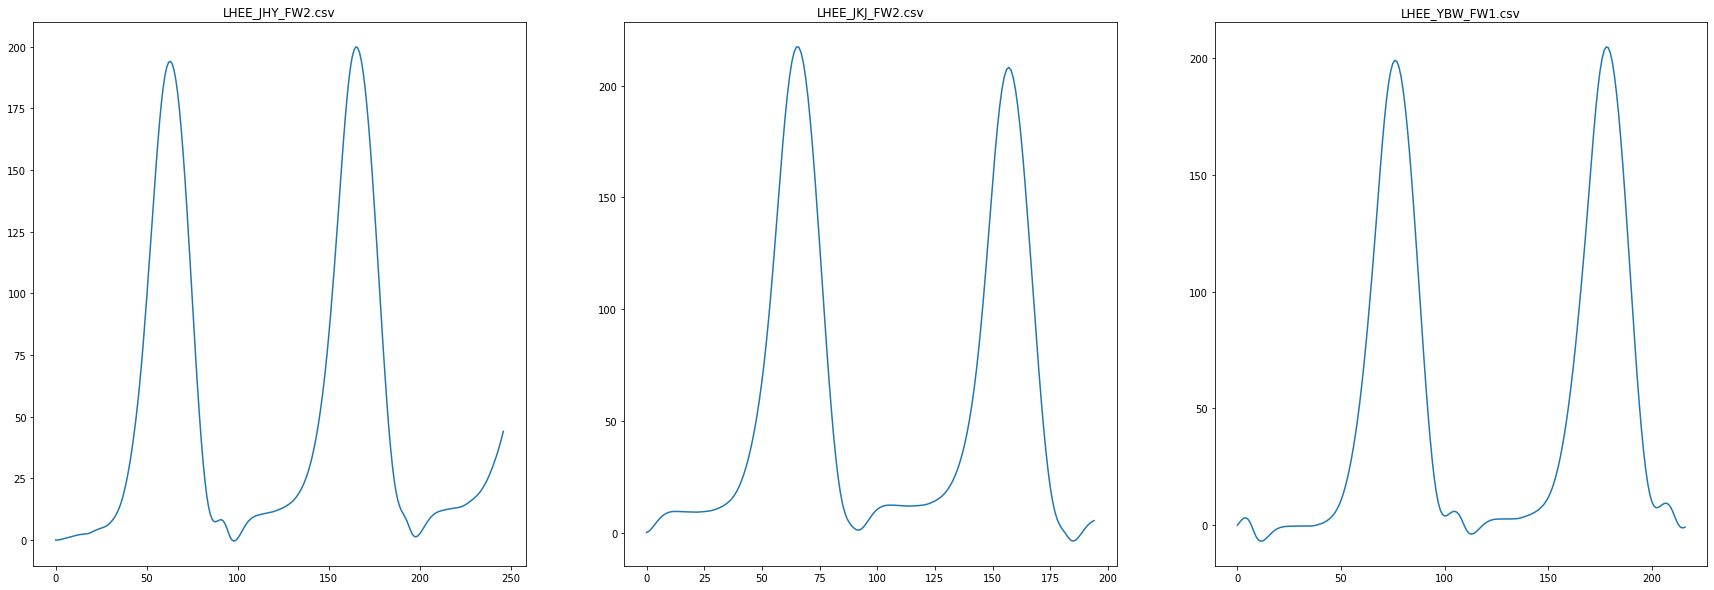

In [44]:
df0 = pd.read_csv(os.path.join(CONTROL, os.listdir(CONTROL)[0]))
df10 = pd.read_csv(os.path.join(CONTROL, os.listdir(CONTROL)[10]))
df20 = pd.read_csv(os.path.join(CONTROL, os.listdir(CONTROL)[20]))

fig, axes = plt.subplots(1,3, figsize=(30, 10))
axes[0].plot(df0["LHEE_Z"])
axes[0].set_title(os.listdir(CONTROL)[0])
axes[1].plot(df10["LHEE_Z"])
axes[1].set_title(os.listdir(CONTROL)[10])
axes[2].plot(df20["LHEE_Z"])
axes[2].set_title(os.listdir(CONTROL)[20])
plt.show()

Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: HEE
Window: 200
Count: 178
Mean:  240436803.27102044
Std:  84522142.52878249


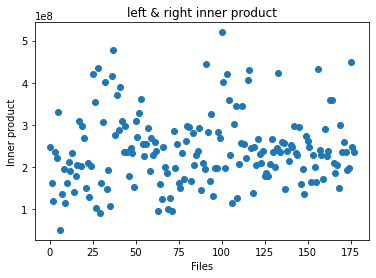

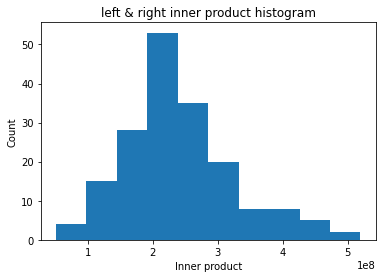

Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: HEE
Window: 200
Count: 35
Mean:  288181578.1108255
Std:  85308200.35466659


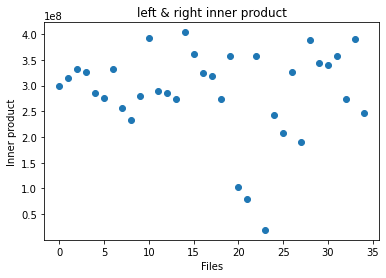

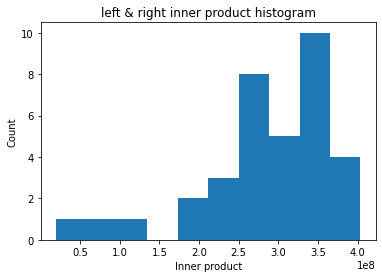

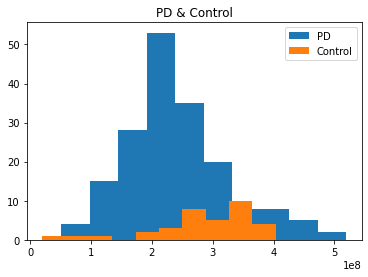

In [45]:
# PD & Control, FW, HEE, 200

# run
results_pd, inner_product_pd = dft_left_right(TARGET_CATE=PD, TARGET_MOTION="FW", TARGET_MARKER="HEE", WINDOW_SIZE=200)
results_control, inner_product_control = dft_left_right(TARGET_CATE=CONTROL, TARGET_MOTION="FW", TARGET_MARKER="HEE", WINDOW_SIZE=200)

# plot
plt.hist(inner_product_pd, label="PD")
plt.hist(inner_product_control, label="Control")
plt.title("PD & Control")
plt.legend()
plt.show()

# save
np.save(os.path.join(SAVEFOLDER, "dft_left_right_FW_HEE_200_PD.npy"), results_pd)
np.save(os.path.join(SAVEFOLDER, "dft_left_right_FW_HEE_200_CONTROL.npy"), results_control)

Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: BW
Marker: HEE
Window: 200
Count: 0
Mean:  nan
Std:  nan


/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


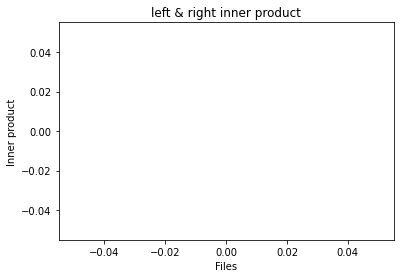

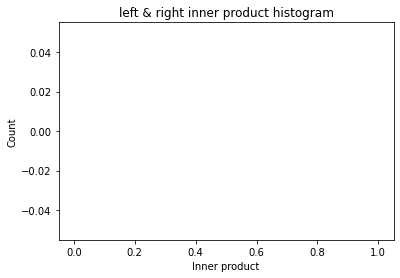

Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: BW
Marker: HEE
Window: 200
Count: 3
Mean:  309345645.12633824
Std:  17473523.110939186


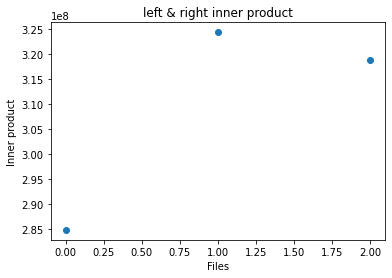

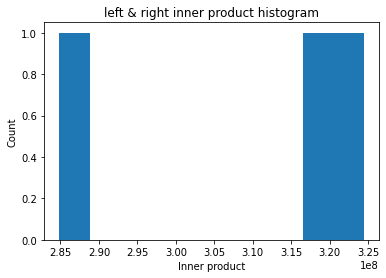

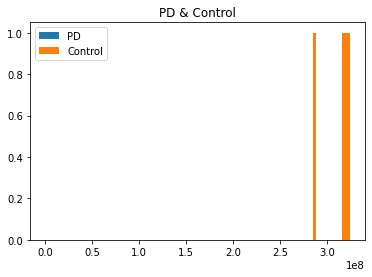

In [15]:
# # PD & Control, BW, HEE, 200

# run
results_pd, inner_product_pd = dft_left_right(TARGET_CATE=PD, TARGET_MOTION="BW", TARGET_MARKER="HEE", WINDOW_SIZE=200)
results_control, inner_product_control = dft_left_right(TARGET_CATE=CONTROL, TARGET_MOTION="BW", TARGET_MARKER="HEE", WINDOW_SIZE=200)

# plot
plt.hist(inner_product_pd, label="PD")
plt.hist(inner_product_control, label="Control")
plt.title("PD & Control")
plt.legend()
plt.show()

# save
np.save(os.path.join(SAVEFOLDER, "dft_left_right_BW_HEE_200_PD.npy"), results_pd)
np.save(os.path.join(SAVEFOLDER, "dft_left_right_BW_HEE_200_CONTROL.npy"), results_control)